In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits
import healpy as hp

from astropy import units

In [2]:
import speclite.filters
from desispec.magnitude import compute_ab_mag

fluxunits = 1e-17 # units.erg / units.s / units.cm**2 / units.Angstrom

import speclite
import desispec
print(speclite.__version__)
print(desispec.__version__)


0.58.1


In [3]:
tt = Table()
tt['wavelength'] = np.arange(3999., 5002.09, 0.1)
tt['response'] = 1.
tt['response'][0] = 0.
tt['response'][-1] = 0.
# tt.write('/global/u2/r/rongpu/temp/tmp1.ecsv', overwrite=True)  # Need to manually modify the header

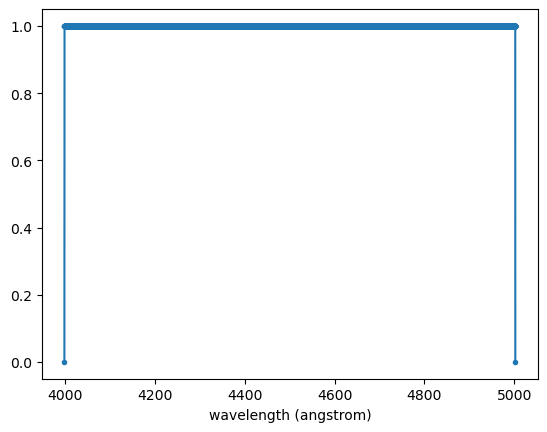

In [4]:
filt = speclite.filters.load_filter('/global/u2/r/rongpu/temp/tmp1.ecsv')
filt_ww, filt_tt = filt.wavelength.copy(), filt.response.copy()
plt.plot(filt_ww, filt_tt, '.-')
plt.xlabel('wavelength (angstrom)')
plt.show()

In [5]:
ww = np.arange(3998.9, 5002.2, 0.1)
ff = np.full(len(ww), 0.5)

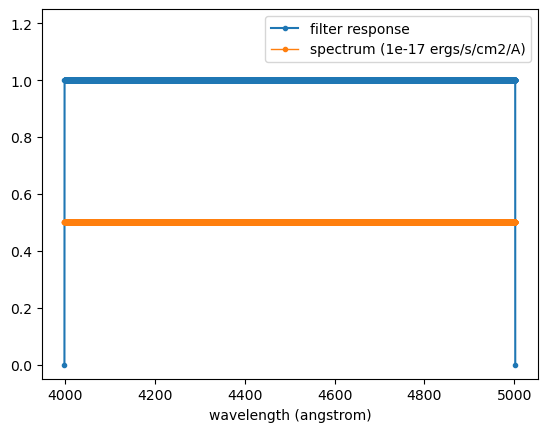

In [6]:
plt.plot(filt_ww, filt_tt, '.-', label='filter response')
plt.plot(ww, ff, '.-', lw=1, alpha=1, label='spectrum (1e-17 ergs/s/cm2/A)')
plt.ylim(-0.05, 1.25)
plt.xlabel('wavelength (angstrom)')
plt.legend()
plt.show()

In [7]:
mag1 = filt.get_ab_magnitude(ff * fluxunits, ww.copy())  # ww.copy() because get_ab_magnitude modifies it
mag2 = compute_ab_mag(ww, ff, filt_ww, filt_tt)
print('speclite_mag - julien_mag (mmag) = {:.2f}  ({:.4f} - {:.4f})'.format(1000*(mag1-mag2), mag1, mag2))
fullmag1 = mag1
fullmag2 = mag2

speclite_mag - julien_mag (mmag) = -9.05  (22.5829 - 22.5920)


------
__Keep the bluer half of spectrum__

In [8]:
print(tt['wavelength'].mean())
ff = np.full(len(ww), 0.5)
ff_sum = ff.sum()
print(ff.sum())
ff[ww>4500] = 0
print(ff.sum(), ff.sum()/ff_sum)

4500.499999999544
5016.5
2506.0 0.49955148011561845


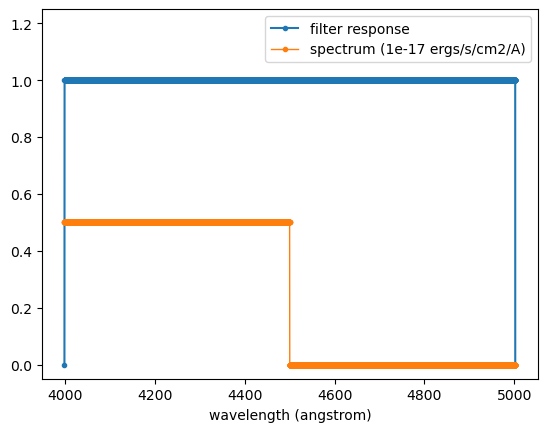

In [9]:
plt.plot(filt_ww, filt_tt, '.-', label='filter response')
plt.plot(ww, ff, '.-', lw=1, alpha=1, label='spectrum (1e-17 ergs/s/cm2/A)')
plt.ylim(-0.05, 1.25)
plt.xlabel('wavelength (angstrom)')
plt.legend()
plt.show()

In [10]:
mag1 = filt.get_ab_magnitude(ff * fluxunits, ww.copy())  # ww.copy() because get_ab_magnitude modifies it
mag2 = compute_ab_mag(ww, ff, filt_ww, filt_tt)
print('speclite_mag - julien_mag (mmag) = {:.2f}  ({:.4f} - {:.4f})'.format(1000*(mag1-mag2), mag1, mag2))
print('speclite flux fraction:  ', 10**(0.4*(fullmag1-mag1)))
print('julien_mag flux fraction:', 10**(0.4*(fullmag2-mag2)))

speclite_mag - julien_mag (mmag) = 53.25  (23.3988 - 23.3455)
speclite flux fraction:   0.4716960853520573
julien_mag flux fraction: 0.49955130122644553


------
__Keep the redder half of spectrum__

In [11]:
print(tt['wavelength'].mean())
ff = np.full(len(ww), 0.5)
ff_sum = ff.sum()
print(ff.sum())
ff[ww<=4500] = 0
print(ff.sum(), ff.sum()/ff_sum)

4500.499999999544
5016.5
2510.5 0.5004485198843815


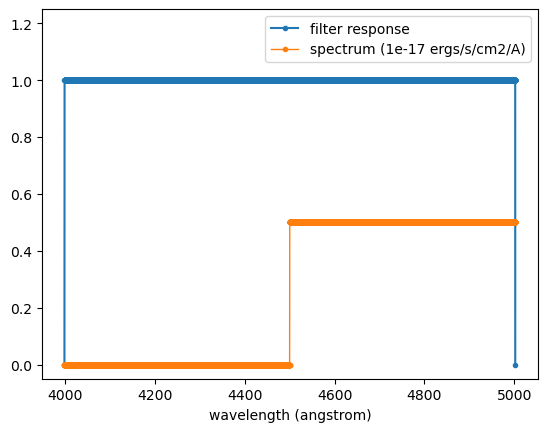

In [12]:
plt.plot(filt_ww, filt_tt, '.-', label='filter response')
plt.plot(ww, ff, '.-', lw=1, alpha=1, label='spectrum (1e-17 ergs/s/cm2/A)')
plt.ylim(-0.05, 1.25)
plt.xlabel('wavelength (angstrom)')
plt.legend()
plt.show()

In [13]:
mag1 = filt.get_ab_magnitude(ff * fluxunits, ww.copy())  # ww.copy() because get_ab_magnitude modifies it
mag2 = compute_ab_mag(ww, ff, filt_ww, filt_tt)
print('speclite_mag - julien_mag (mmag) = {:.2f}  ({:.4f} - {:.4f})'.format(1000*(mag1-mag2), mag1, mag2))
print('speclite flux fraction:  ', 10**(0.4*(fullmag1-mag1)))
print('julien_mag flux fraction:', 10**(0.4*(fullmag2-mag2)))

speclite_mag - julien_mag (mmag) = -67.86  (23.2757 - 23.3436)
speclite flux fraction:   0.5283039146479444
julien_mag flux fraction: 0.5004486987735579
